## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
#import wget
#file = wget.download('https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt')
#print(file)
# If you didn't download it yet, please get the relevant file now!
#!pip install wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [17]:
filename = '/Users/Nico/Documents/LaboratoryOfComputationalPhysics_Y4/data_000637.txt'
N = 100000
data = pd.read_csv(filename, nrows=N)
data.head()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25


In [10]:
data.describe()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
count,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000
mean,1.0,0.294840,56.031850,3.869201e+09,1792.946820,13.360150
std,0.0,0.455973,39.118372,2.868888e+02,1025.768294,9.190047
min,1.0,0.000000,1.000000,3.869200e+09,0.000000,0.000000
25%,1.0,0.000000,26.000000,3.869200e+09,897.000000,5.000000
50%,1.0,0.000000,57.000000,3.869201e+09,1794.000000,13.000000
75%,1.0,1.000000,64.000000,3.869201e+09,2679.000000,21.000000
max,1.0,1.000000,139.000000,3.869201e+09,3563.000000,29.000000


2\. Find out the number of BX in a ORBIT (the value 'x').

In [15]:
orbits = data['ORBIT_CNT'].max() - data['ORBIT_CNT'].min() # total amount of orbits over entire dataset
bxTotal = data['BX_COUNTER'].max() - data['BX_COUNTER'].min() # total amount of time in "bx" units over entire dataset
tdcTotal = data['TDC_MEAS'].max() - data['TDC_MEAS'].min() # total amount of time in "tdc" units

orbitTime = (bxTotal/orbits)*25 # time taken for 1 orbit in ns

print(f'Every orbit corresponds to {(bxTotal/orbits)} BX, or {orbitTime} ns')

Every orbit corresponds to 3.584507042253521 BX, or 89.61267605633803 ns


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [21]:
totalMeasurementsTaken = 1310721 # obtained by looking directly at number of rows in txt file
totalTime = orbits*orbitTime + bxTotal*25 + tdcTotal*(25/30)# total time in ns
fractionOfMeasurements = N/totalMeasurementsTaken # fraction of the measurements being taken into account

print(f'Estimate of the total amount of time taken is {totalTime/fractionOfMeasurements} ns or {(totalTime/1e9)/fractionOfMeasurements} s')

Estimate of the total amount of time taken is 2335366.219075 ns or 0.0023353662190749996 s


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [13]:
data['timens'] = data['ORBIT_CNT']*orbitTime + data['BX_COUNTER']*25 + data['TDC_MEAS']*(25/30)
#print(data['timens'].max() - data['timens'].min())
data.describe()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
count,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,1.000000e+05
mean,1.0,0.294840,56.031850,3.869201e+09,1792.946820,13.360150,3.467295e+11
std,0.0,0.455973,39.118372,2.868888e+02,1025.768294,9.190047,3.634749e+04
min,1.0,0.000000,1.000000,3.869200e+09,0.000000,0.000000,3.467294e+11
25%,1.0,0.000000,26.000000,3.869200e+09,897.000000,5.000000,3.467294e+11
50%,1.0,0.000000,57.000000,3.869201e+09,1794.000000,13.000000,3.467295e+11
75%,1.0,1.000000,64.000000,3.869201e+09,2679.000000,21.000000,3.467295e+11
max,1.0,1.000000,139.000000,3.869201e+09,3563.000000,29.000000,3.467296e+11


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [32]:
data.at[:, 'HEAD'] = np.random.choice(2,len(data['HEAD']))
data.describe()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
count,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000
mean,0.501110,0.294840,56.031850,3.869201e+09,1792.946820,13.360150
std,0.500001,0.455973,39.118372,2.868888e+02,1025.768294,9.190047
min,0.000000,0.000000,1.000000,3.869200e+09,0.000000,0.000000
25%,0.000000,0.000000,26.000000,3.869200e+09,897.000000,5.000000
50%,1.000000,0.000000,57.000000,3.869201e+09,1794.000000,13.000000
75%,1.000000,1.000000,64.000000,3.869201e+09,2679.000000,21.000000
max,1.000000,1.000000,139.000000,3.869201e+09,3563.000000,29.000000


6\. Create a new DataFrame that contains only the rows with HEAD=1.


In [52]:
newData = data[data.HEAD == 1]
newData.describe()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
count,50111.0,50111.000000,50111.000000,5.011100e+04,50111.000000,50111.000000
mean,1.0,0.294965,55.872802,3.869201e+09,1799.478997,13.430085
std,0.0,0.456032,39.091984,2.861934e+02,1025.066528,9.202831
min,1.0,0.000000,1.000000,3.869200e+09,0.000000,0.000000
25%,1.0,0.000000,26.000000,3.869200e+09,907.000000,5.000000
50%,1.0,0.000000,57.000000,3.869201e+09,1798.000000,13.000000
75%,1.0,1.000000,64.000000,3.869201e+09,2687.000000,21.000000
max,1.0,1.000000,139.000000,3.869201e+09,3563.000000,29.000000


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel


In [64]:
#First create 2 new dataframes for each FPGA
fpga0 = data[data.FPGA == 0]
fpga1 = data[data.FPGA == 1]

Text(0.5, 1.0, 'Number of Counts per TDC Channel for FPGA 0')

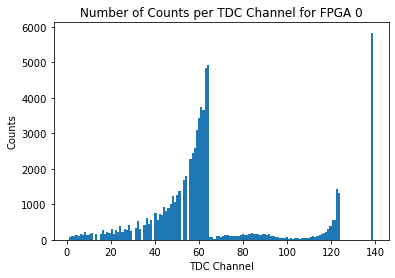

In [95]:
#Plot for FPGA 0
plot0 = fpga0['TDC_CHANNEL'].plot.hist(bins=139)
plot0.set_xlabel('TDC Channel')
plot0.set_ylabel('Counts')
plot0.set_title('Number of Counts per TDC Channel for FPGA 0')

Text(0.5, 1.0, 'Number of Counts per TDC Channel for FPGA 1')

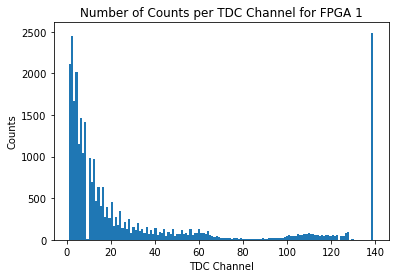

In [110]:
#Plot for FPGA 1
plot1 = fpga1['TDC_CHANNEL'].plot.hist(bins=139)
plot1.set_xlabel('TDC Channel')
plot1.set_ylabel('Counts')
plot1.set_title('Number of Counts per TDC Channel for FPGA 1')

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)


In [111]:
# top 3 bins with the most counts
noisy = data.groupby('TDC_CHANNEL').size().nlargest(3)
print(noisy)

TDC_CHANNEL
139    8320
64     5027
63     4917
dtype: int64


9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [113]:
uniqueOrbits = data['ORBIT_CNT'].nunique()
print(f'There are {uniqueOrbits} number of unique orbits')

There are 995 number of unique orbits


In [121]:
channel139 = data[data['TDC_CHANNEL'] == 139] # all measurements coming from channel 139
result=channel139.groupby('ORBIT_CNT').size()
print(f'There are {result} orbits with at least one measurement from the TDC_CHANNEL 139')

There are ORBIT_CNT
3869200167     4
3869200168     8
3869200169    11
3869200170     9
3869200171     9
              ..
3869201157    10
3869201158     6
3869201159     8
3869201160     4
3869201161     9
Length: 994, dtype: int64 orbits with at least one measurement from the TDC_CHANNEL 139
